In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## DATA


In [36]:
X = pd.read_csv("unique_subject_ids_df.csv") # preprocessed data
d_icd = pd.read_csv("DIAGNOSES_ICD.csv")  # contains the icd codes and their corresponding patients
d_icd_all = pd.read_csv("DIAGNOSES_ICD.csv")  
icd_names = pd.read_csv("D_ICD_DIAGNOSES.csv")  # contains the corresponding names of the icd codes

In [37]:
X = X.dropna()  # remove null values of the preprocessed data

In [38]:
# split age in age groups
X['AGE_GROUP'] = pd.cut(X['Age'] , bins = [0,20,30,40,50,60,70,80,120], labels=['0-20','20-30', '30-40','40-50', '50-60', '60-70', '70-80', '80+'])

In [40]:
# female should be represented by a 0 and male by a 1
X['Gender'] = X['Gender'].replace('S', 0)
print(X)

     SUBJECT_ID  INFECTIONS  NEOPLASMS  DISORDERS OF THYROID GLAND  \
0            25           0          0                           1   
2           192           0          0                           0   
3           234           0          0                           0   
4           263           0          0                           0   
5           271           0          0                           0   
..          ...         ...        ...                         ...   
994       99294           0          0                           0   
995       99383           0          0                           0   
996       99444           0          0                           0   
997       99650           0          0                           0   
998       99928           0          0                           1   

     DISEASES OF ENDOCRINE GLANDS  \
0                               0   
2                               0   
3                               0   
4          

In [41]:
# count the distribution of numbers
X_grouped = X.groupby(["AGE_GROUP"])["SUBJECT_ID"].count()
X_grouped

AGE_GROUP
0-20      13
20-30    106
30-40    119
40-50    216
50-60    222
60-70    155
70-80     85
80+        9
Name: SUBJECT_ID, dtype: int64

In [42]:
X = X.drop('Age', axis = 1)  # now the age can be dropped since we have age groups

In [44]:
X_neu = pd.get_dummies(X['AGE_GROUP'])  # convert the groups to one hot encoded data

In [45]:
X = pd.concat([X, X_neu], axis = 1)  # combine both one hot encoded dataframes

In [46]:
X = X.drop('AGE_GROUP', axis = 1)  # now the age group can also be dropped
X = X.drop('SUBJECT_ID', axis = 1)  # as well as the subject id, since each row represents a subject

In [48]:
# Abbrevations for comorbidities since the names of groups are too long
abbreviation_mapping = {
    'INFECTIONS': 'INF',
    'NEOPLASMS': 'NEO',
    'DISORDERS OF THYROID GLAND': 'THY',
    'DISEASES OF ENDOCRINE GLANDS': 'END',
    'NUTRITIONAL, METABOLIC DISEASE AND IMMUNITY DISORDERS': 'MET',
    'DISEAESE OF BLOOD': 'BLD',
    'MENTAL DISORDERS': 'MENT',
    'DISEASES OF NERVOUS SYSTEM': 'NS',
    'DISORDERS OF THE EYE': 'EYE',
    'DISEASES OF THE M GENITAL ORGANS': 'MALE GEN',
    'DISORDERS OF F GENITAL TRACT': 'FEM GEN',
    'DISEASES OF THE SKIN/TISSUE': 'SKIN',
    'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE': 'MUSC-SKEL',
    'CONGENITAL ANOMALIES': 'CONG',
    'COMPLICATIONS OF PREGNANCY OR CHILDBIRTH': 'PREG COMPL',
    'INJURY/POISONING': 'INJ/POIS',
    'DISEASES OF CIRCULATORY SYSTEM': 'CS',
    'DISEASES OF THE URINARY SYSTEM': 'US',
    'DISEASES OF THE DIGESTIVE SYSTEM': 'DS',
    'DISEASES OF THE RESPIRATORY SYSTEM': 'RS',
    'HYPERTENSION' : 'HT',
    'NEPHRITIS, NEPHROTIC SYNDROME ANS NEPHROSIS': 'NNSAN'
}

X_shortened = X.rename(columns=abbreviation_mapping)
print(X_shortened)

     INF  NEO  THY  END  MET  BLD  MENT  NS  EYE  CS  ...  INJ/POIS  Gender  \
0      0    0    1    0    0    0     0   0    0   0  ...         0       1   
2      0    0    0    0    0    0     0   0    0   0  ...         0       1   
3      0    0    0    0    0    1     0   0    0   0  ...         0       1   
4      0    0    0    1    0    0     0   0    0   0  ...         0       1   
5      0    0    0    0    0    0     0   0    0   0  ...         0       0   
..   ...  ...  ...  ...  ...  ...   ...  ..  ...  ..  ...       ...     ...   
994    0    0    0    0    0    0     0   1    0   0  ...         0       0   
995    0    0    0    0    0    0     0   1    0   0  ...         0       1   
996    0    0    0    0    0    0     0   0    0   0  ...         0       1   
997    0    0    0    0    0    0     0   0    1   0  ...         0       0   
998    0    0    1    0    0    0     0   0    0   0  ...         0       0   

     0-20  20-30  30-40  40-50  50-60  60-70  70-80

In [49]:
X_shortened

,INF,NEO,THY,END,MET,BLD,MENT,NS,EYE,CS,...,INJ/POIS,Gender,0-20,20-30,30-40,40-50,50-60,60-70,70-80,80+
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
995,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## K MEANS CLUSTERING

https://realpython.com/k-means-clustering-python/

Computing the K means algorithm without any dimension reduction and also visualising the distribution of clusters

In [50]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

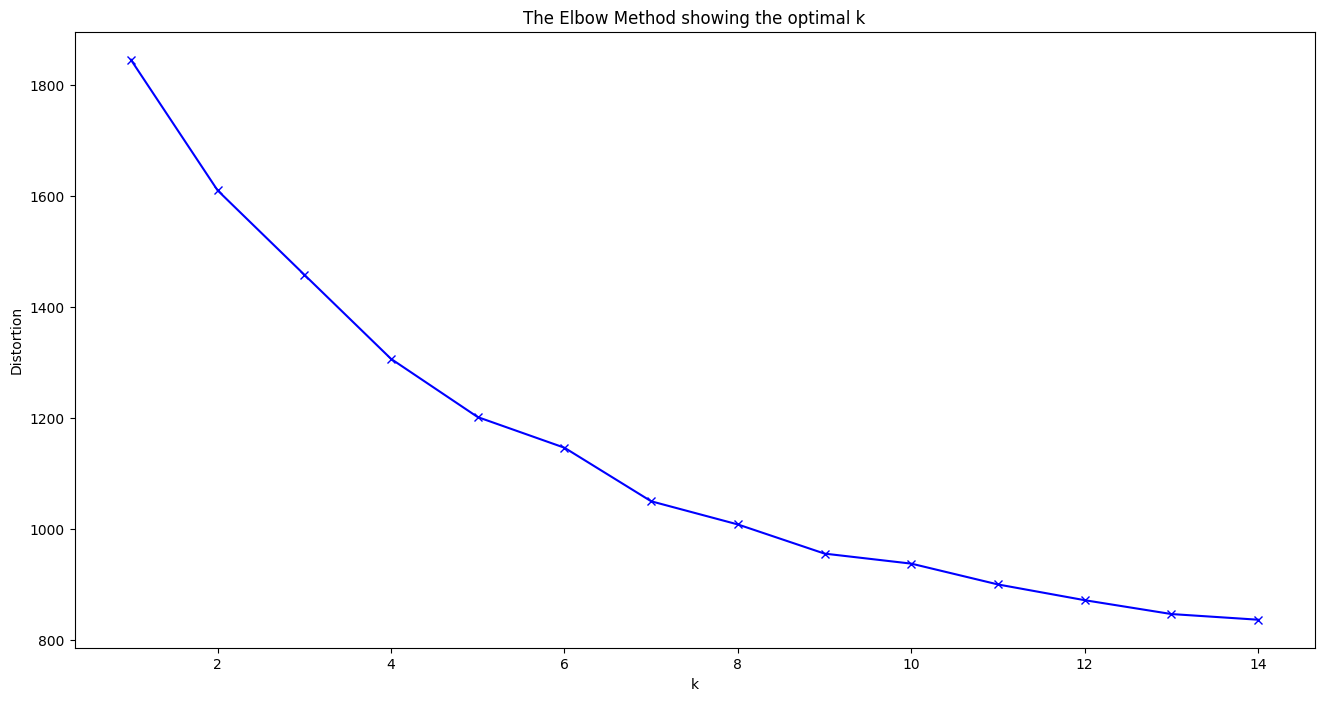

In [51]:
# Using the elbow method to explore the ideal cluster size
# https://predictivehacks.com/k-means-elbow-method-code-for-python/
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_shortened)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [52]:
# testing a cluster size of 3 to 8 and compute the clusters
kmeans_3 = KMeans(init="random",n_clusters=3,n_init=10,max_iter=100,random_state=42)
label_3 = kmeans_3.fit_predict(X_shortened)

kmeans_4 = KMeans(init="random",n_clusters=4,n_init=10,max_iter=100,random_state=42)
label_4 = kmeans_4.fit_predict(X_shortened)

kmeans_5 = KMeans(init="random",n_clusters=5,n_init=10,max_iter=100,random_state=42)
label_5 = kmeans_5.fit_predict(X_shortened)

kmeans_6 = KMeans(init="random",n_clusters=6,n_init=10,max_iter=100,random_state=42)
label_6 = kmeans_6.fit_predict(X_shortened)

kmeans_7 = KMeans(init="random",n_clusters=7,n_init=10,max_iter=100,random_state=42)
label_7 = kmeans_7.fit_predict(X_shortened)

kmeans_8 = KMeans(init="random",n_clusters=8,n_init=10,max_iter=100,random_state=42)
label_8 = kmeans_8.fit_predict(X_shortened)

Visualize every clustering for each computed size

<Axes: >

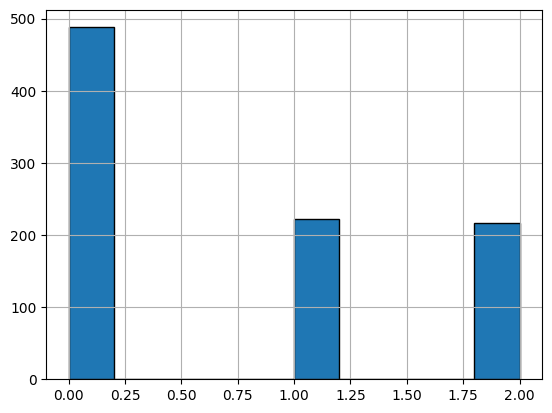

In [54]:
# k = 3
X_3 = X_shortened.copy()
X_3['Class'] = label_3
X_3['Class'].hist(edgecolor='black')

<Axes: >

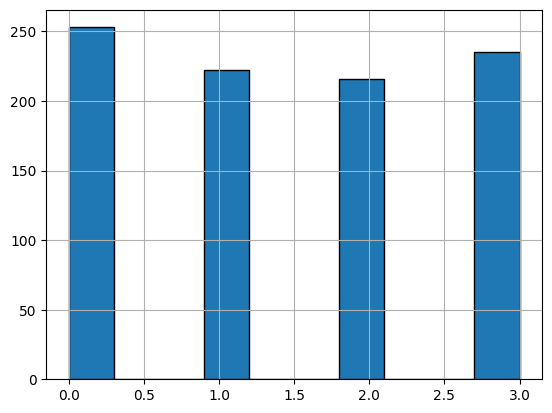

In [55]:
# k = 4
X_4 = X_shortened.copy()
X_4['Class'] = label_4
X_4['Class'].hist(edgecolor='black')

<Axes: >

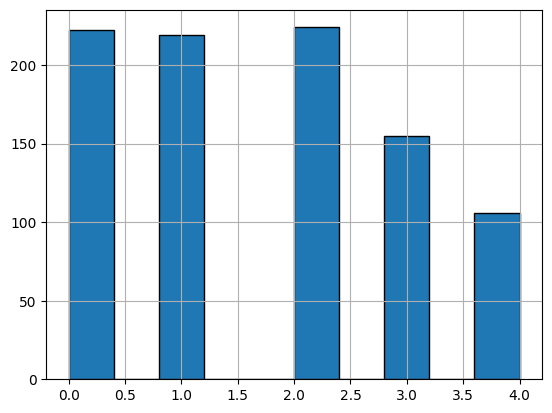

In [56]:
# k = 5
X_5 = X_shortened.copy()
X_5['Class'] = label_5
X_5['Class'].hist(edgecolor='black')

<Axes: >

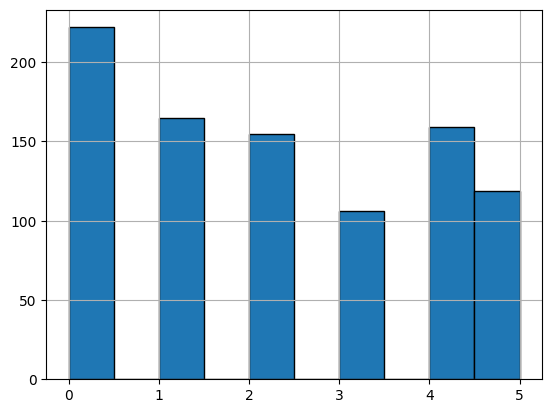

In [57]:
# k = 6
X_6 = X_shortened.copy()
X_6['Class'] = label_6
X_6['Class'].hist(edgecolor='black')

<Axes: >

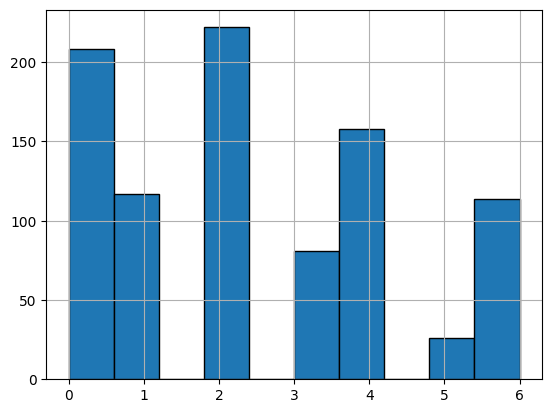

In [58]:
# k = 7
X_7 = X_shortened.copy()
X_7['Class'] = label_7
X_7['Class'].hist(edgecolor='black')

<Axes: >

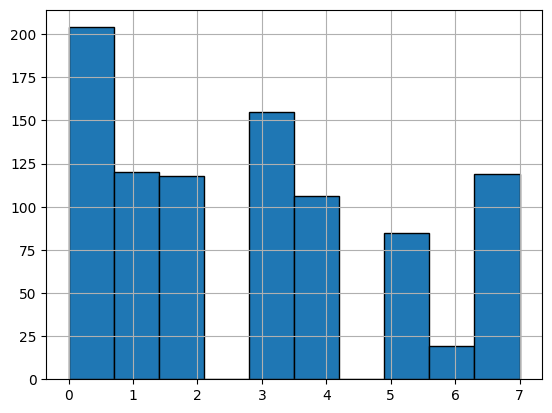

In [59]:
# k = 8
X_8 = X_shortened.copy()
X_8['Class'] = label_8
X_8['Class'].hist(edgecolor='black')

## umap

https://github.com/MaxHalford/prince

Using UMAP for dimension reduction and then cluster with k Means

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import umap
import umap.plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


     INF  NEO  THY  END  MET  BLD  MENT  NS  EYE  CS  ...  Gender  0-20  \
0      0    0    1    0    0    0     0   0    0   0  ...       1     0   
2      0    0    0    0    0    0     0   0    0   0  ...       1     0   
3      0    0    0    0    0    1     0   0    0   0  ...       1     0   
4      0    0    0    1    0    0     0   0    0   0  ...       1     0   
5      0    0    0    0    0    0     0   0    0   0  ...       0     0   
..   ...  ...  ...  ...  ...  ...   ...  ..  ...  ..  ...     ...   ...   
994    0    0    0    0    0    0     0   1    0   0  ...       0     0   
995    0    0    0    0    0    0     0   1    0   0  ...       1     0   
996    0    0    0    0    0    0     0   0    0   0  ...       1     0   
997    0    0    0    0    0    0     0   0    1   0  ...       0     0   
998    0    0    1    0    0    0     0   0    0   0  ...       0     0   

     20-30  30-40  40-50  50-60  60-70  70-80  80+  Cluster  
0        0      0      0      1      

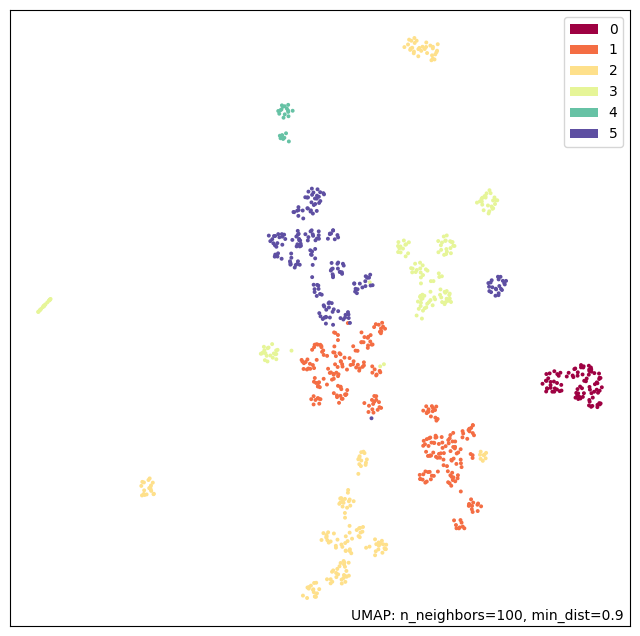

In [60]:
# Convert the DataFrame to a NumPy array
data = X_shortened.to_numpy()

# Perform UMAP embedding
embedding = umap.UMAP(n_neighbors=20, min_dist=0.5, n_components=3, random_state = 42).fit_transform(data)

# Perform KMeans clustering on the embedding
kmeans = KMeans(init="random", n_clusters=6, n_init=10, max_iter=100, random_state=42)
labels = kmeans.fit_predict(embedding)

# Add the cluster labels to the original DataFrame
X_with_clusters = X_shortened.copy()
X_with_clusters['Cluster'] = labels

# Plot the UMAP visualization with cluster labels
mapper = umap.UMAP(n_neighbors=100, min_dist=0.9, n_components=2, random_state = 42).fit(embedding)
umap.plot.points(mapper, labels=labels)


print(X_with_clusters)

In [61]:
# Group the dataframe by the computed clusters
cluster_groups = X_with_clusters.groupby('Cluster')

# Dictionary to store the cluster information for each cluster
cluster_dataframes = {}

# Iterate over cluster groups and store each cluster seperately
for cluster_label, cluster_data in cluster_groups:
    cluster_dataframes[cluster_label] = cluster_data

best_cluster_0_df = cluster_dataframes[0]
best_cluster_1_df = cluster_dataframes[1]
best_cluster_2_df = cluster_dataframes[2]
best_cluster_3_df = cluster_dataframes[3]
best_cluster_4_df = cluster_dataframes[4]
best_cluster_5_df = cluster_dataframes[5]

In [62]:
# Remove columns with only 0 values but not gender since 0 gender means all females
columns_to_remove = []
for column in best_cluster_0_df.columns:
    if column != "Gender" and (best_cluster_0_df[column] == 0).all():
        columns_to_remove.append(column)

# Remove the columns which are not significant
best_cluster_0_df = best_cluster_0_df.drop(columns=columns_to_remove)

print(best_cluster_0_df)

     INF  THY  MET  BLD  NS  EYE  CS  RS  DS  NNSAN  FEM GEN  MUSC-SKEL  CONG  \
30     0    0    0    0   0    0   0   0   0      0        0          0     0   
43     0    0    0    0   0    0   1   0   0      0        0          0     0   
51     0    0    0    0   0    0   0   0   1      0        0          0     0   
63     0    0    0    0   0    0   1   0   0      0        0          0     0   
92     0    0    0    0   0    0   1   0   0      0        0          0     0   
..   ...  ...  ...  ...  ..  ...  ..  ..  ..    ...      ...        ...   ...   
962    0    0    0    1   0    0   0   0   0      0        0          0     0   
964    0    0    0    0   0    0   0   0   1      0        0          0     0   
965    0    0    1    0   0    0   0   0   0      0        0          0     0   
995    0    0    0    0   1    0   0   0   0      0        0          0     0   
998    0    1    0    0   0    0   0   0   0      0        0          0     0   

     PREG COMPL  INJ/POIS G

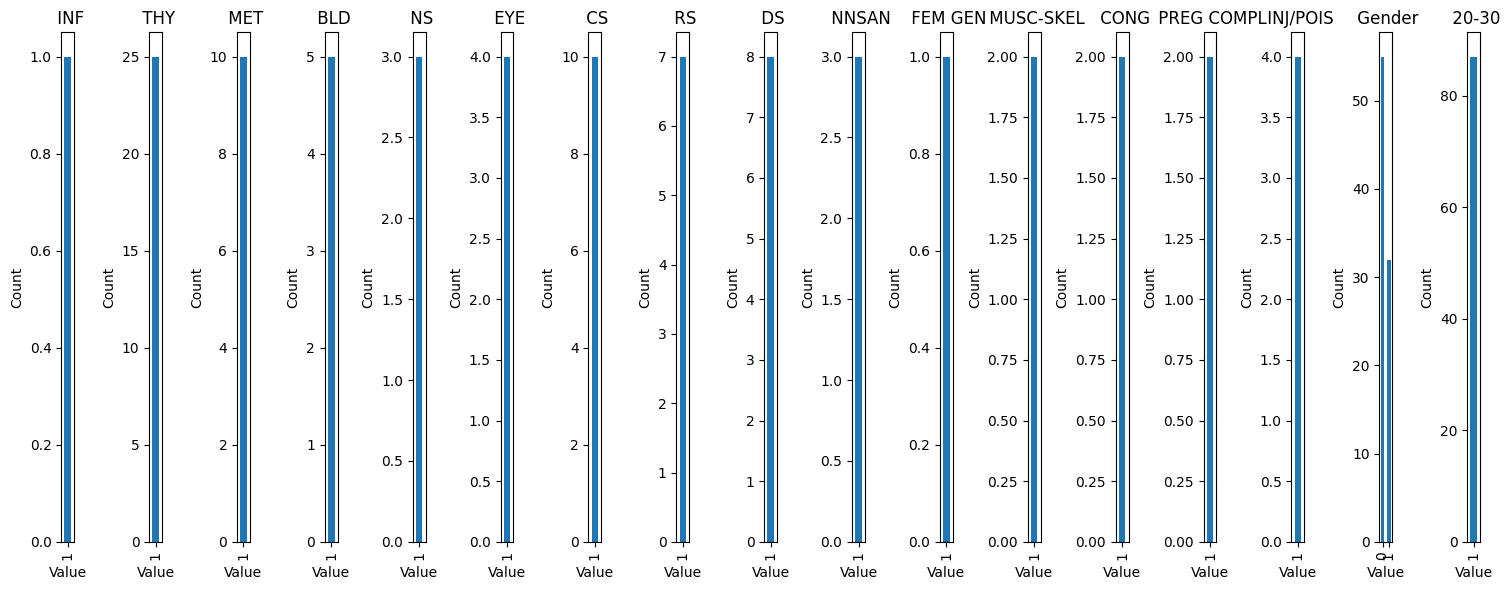

In [63]:
import matplotlib.pyplot as plt

# Plot the distribution of clomuns in the cluster


num_columns = len(best_cluster_0_df.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(15, 6))


for idx, column in enumerate(best_cluster_0_df.columns):
    if column == 'Gender':
        best_cluster_0_df[column].value_counts().plot(kind='bar', ax=axes[idx])
    else:
        best_cluster_0_df[column][best_cluster_0_df[column] != 0].value_counts().plot(kind='bar', ax=axes[idx])
        
    axes[idx].set_title(f' {column}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

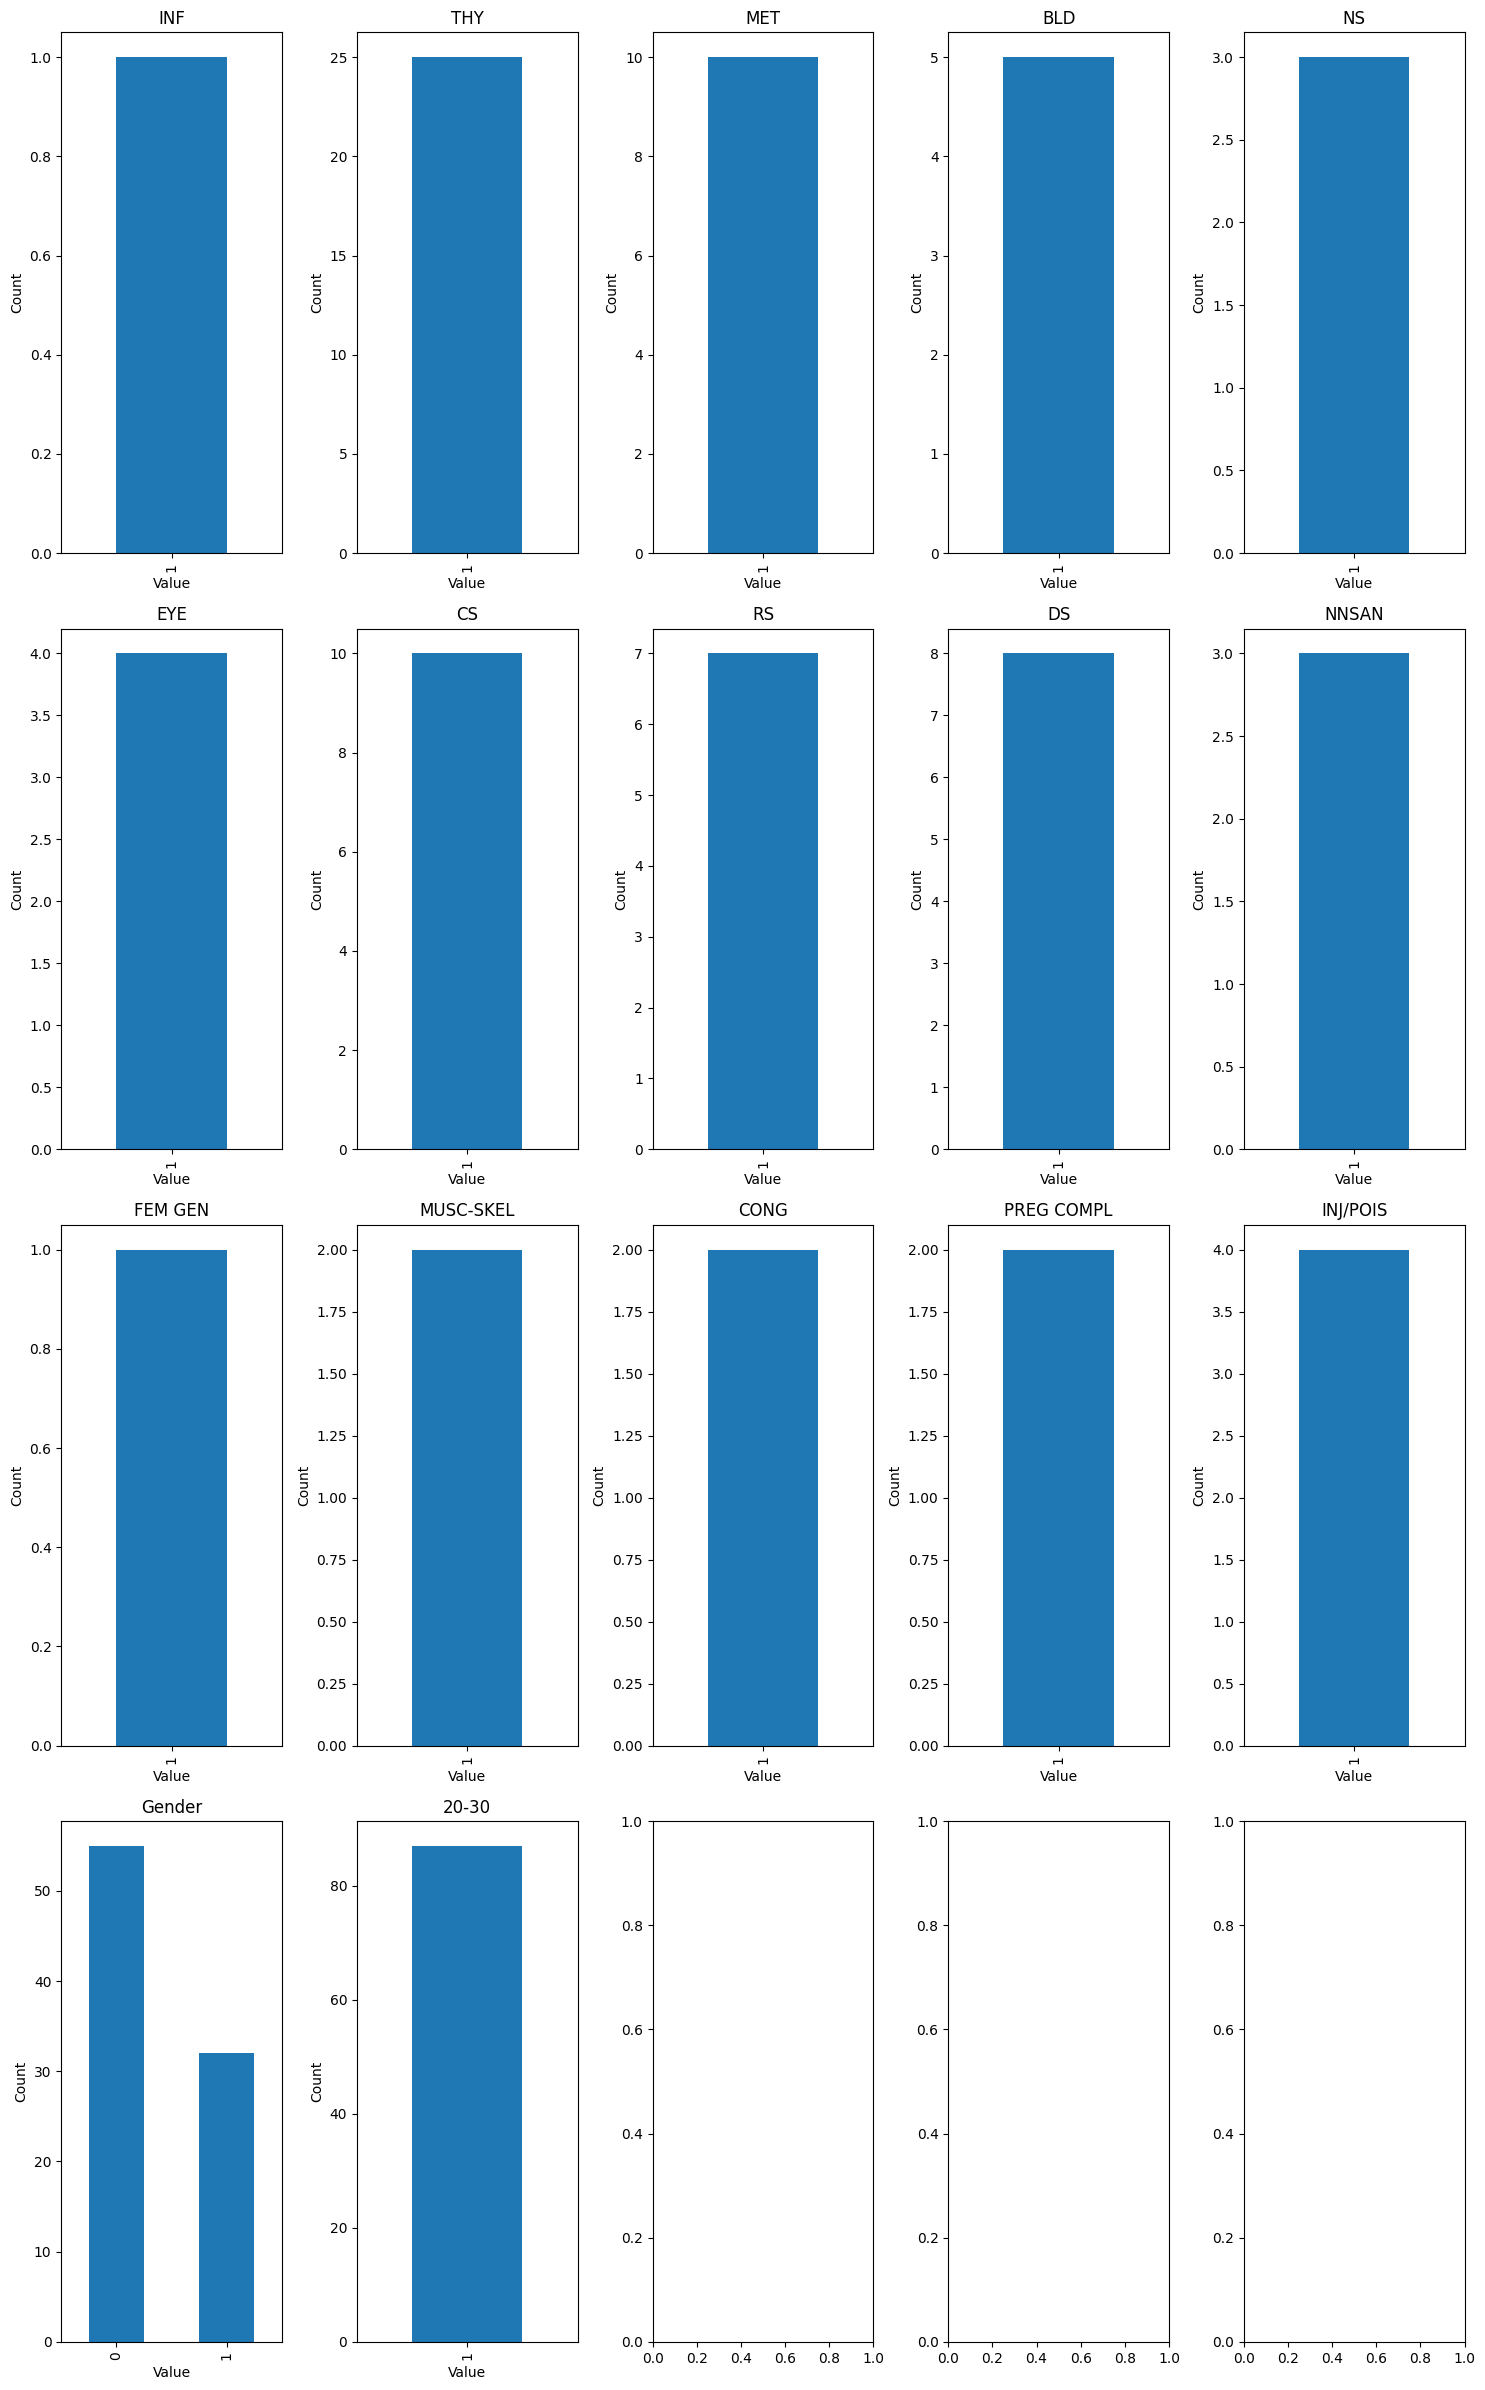

In [74]:
import matplotlib.pyplot as plt


column_pairs = [best_cluster_0_df.columns[i:i+5] for i in range(0, len(best_cluster_0_df.columns), 5)]

num_column_pairs = len(column_pairs)
fig, axes = plt.subplots(num_column_pairs, 5, figsize=(15, 6*num_column_pairs))

for row, pair in enumerate(column_pairs):
    for col, column in enumerate(pair):
        ax = axes[row, col]
        if column == 'Gender':
            best_cluster_0_df[column].value_counts().plot(kind='bar', ax=ax)
        else:
            best_cluster_0_df[column][best_cluster_0_df[column] != 0].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(f'{column}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

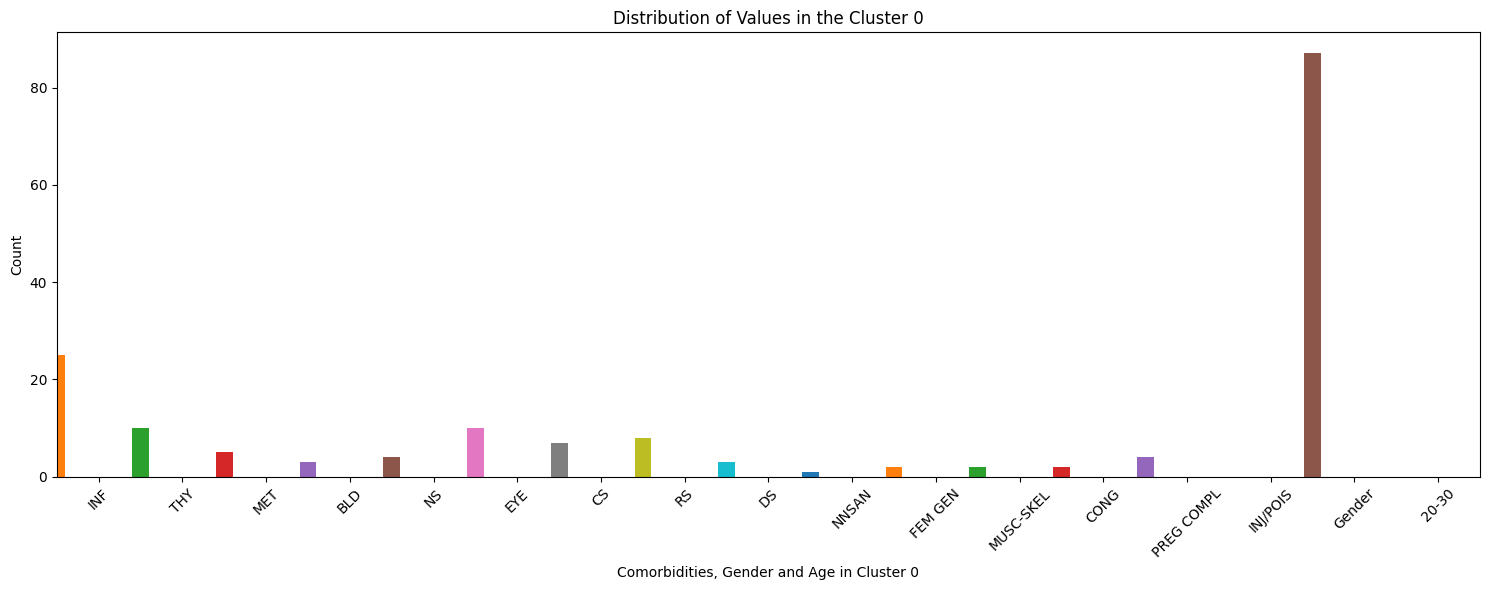

In [75]:
import matplotlib.pyplot as plt

# Distribution of cluster values in Cluster 0 

plt.figure(figsize=(15, 6))

bar_width = 0.2

for idx, column in enumerate(best_cluster_0_df.columns):
    if column != 'Gender':
        values = best_cluster_0_df[column][best_cluster_0_df[column] != 0].value_counts()
        x_positions = idx + (bar_width * (values.index - len(best_cluster_0_df.columns) / 2))
        plt.bar(x_positions, values, width=bar_width, label=column)

plt.xlabel('Comorbidities, Gender and Age in Cluster 0')
plt.ylabel('Count')
plt.title('Distribution of Values in the Cluster 0')
plt.xticks(range(len(best_cluster_0_df.columns)), best_cluster_0_df.columns, rotation=45)

ax = plt.gca()

ax.set_xlim(-0.5, len(best_cluster_0_df.columns) - 0.5)

plt.tight_layout()
plt.show()


In [77]:
# Cluster 1, remove columns which are not significant
columns_to_remove = []
for column in best_cluster_1_df.columns:
    if column != "Gender" and (best_cluster_1_df[column] == 0).all():
        columns_to_remove.append(column)


best_cluster_1_df = best_cluster_1_df.drop(columns=columns_to_remove)


print(best_cluster_1_df)

     INF  NEO  THY  END  MET  BLD  MENT  NS  EYE  CS  ...  Gender  0-20  \
7      0    0    0    0    0    1     0   0    0   0  ...       0     0   
8      0    0    0    0    1    0     0   0    0   0  ...       1     0   
19     0    0    0    0    0    0     1   0    0   0  ...       0     0   
20     0    0    1    0    0    0     0   0    0   0  ...       1     0   
23     0    0    0    1    0    0     0   0    0   0  ...       1     0   
..   ...  ...  ...  ...  ...  ...   ...  ..  ...  ..  ...     ...   ...   
987    1    0    0    0    0    0     0   0    0   0  ...       1     0   
988    0    0    0    0    0    0     0   0    0   0  ...       1     0   
990    0    0    0    0    0    0     1   0    0   0  ...       0     0   
993    0    0    0    0    1    0     0   0    0   0  ...       1     0   
996    0    0    0    0    0    0     0   0    0   0  ...       1     0   

     20-30  30-40  40-50  50-60  60-70  70-80  80+  Cluster  
7        0      0      0      0      

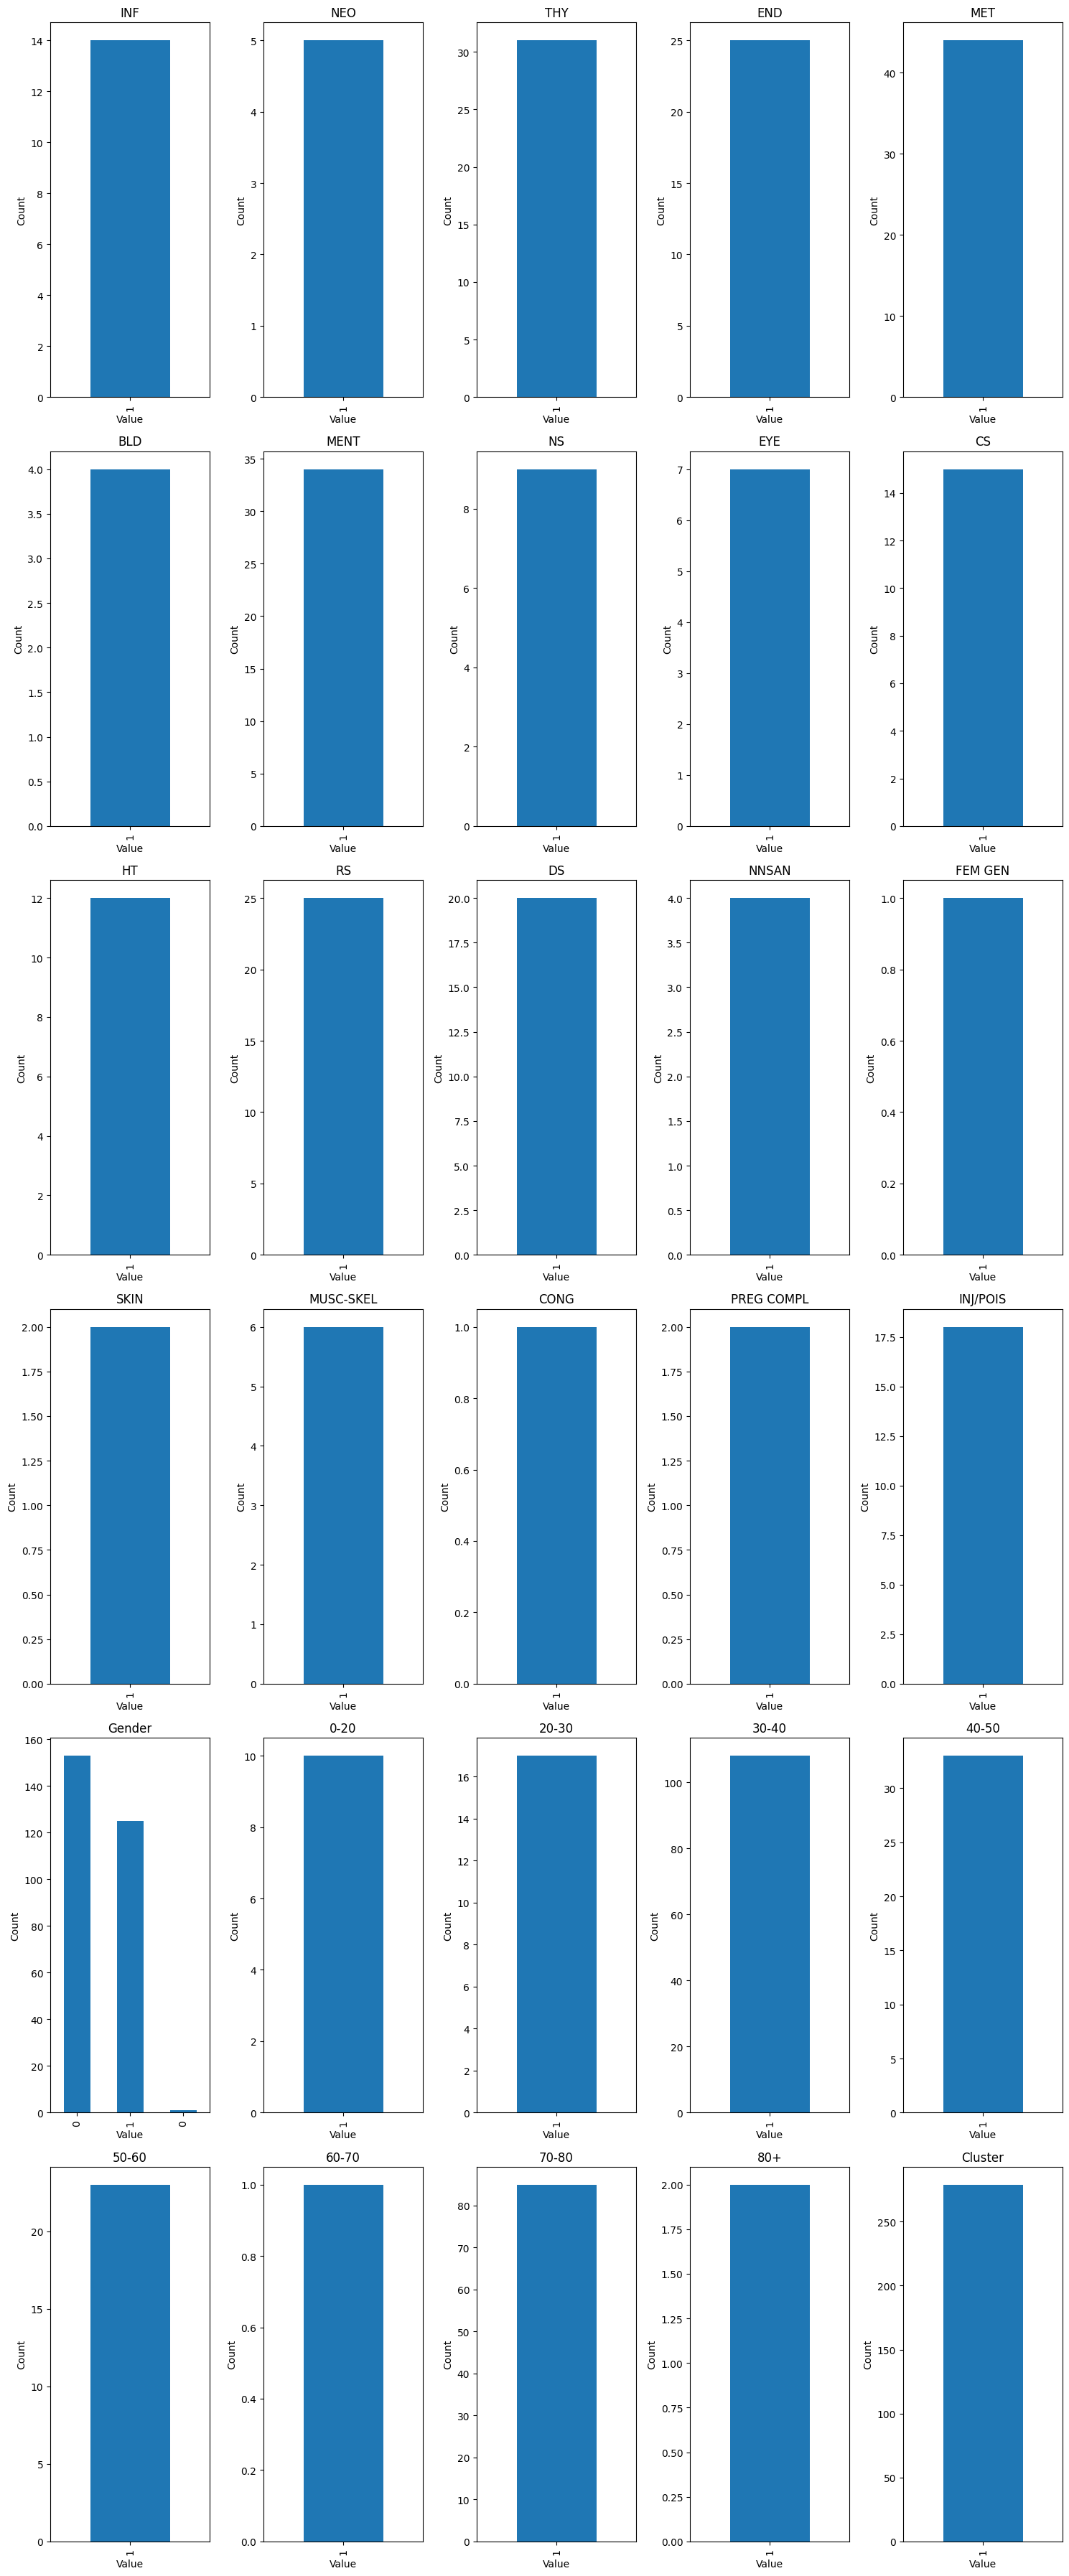

In [78]:
import matplotlib.pyplot as plt


column_pairs = [best_cluster_1_df.columns[i:i+5] for i in range(0, len(best_cluster_1_df.columns), 5)]


num_column_pairs = len(column_pairs)
fig, axes = plt.subplots(num_column_pairs, 5, figsize=(15, 6*num_column_pairs))


for row, pair in enumerate(column_pairs):
    for col, column in enumerate(pair):
        ax = axes[row, col]
        if column == 'Gender':
            best_cluster_1_df[column].value_counts().plot(kind='bar', ax=ax)
        else:
            best_cluster_1_df[column][best_cluster_1_df[column] != 0].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(f'{column}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

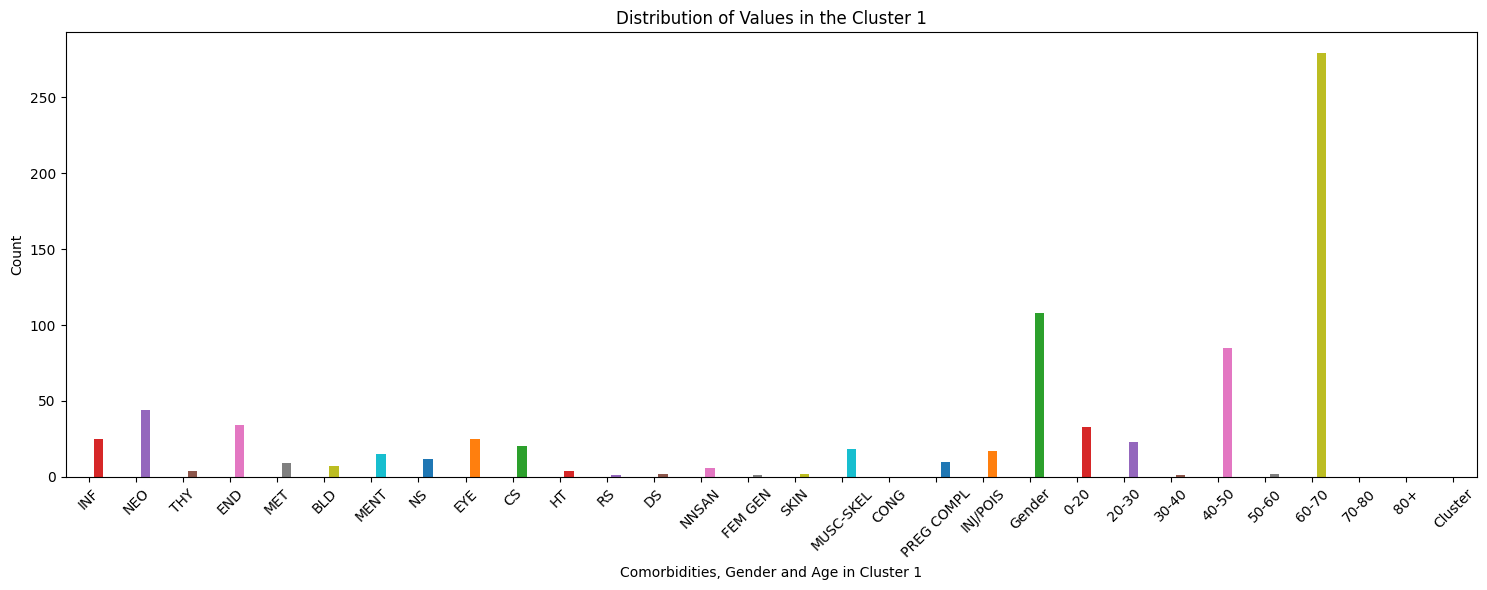

In [79]:
import matplotlib.pyplot as plt

# Distribution of cluster values in Cluster 1
plt.figure(figsize=(15, 6))


bar_width = 0.2


for idx, column in enumerate(best_cluster_1_df.columns):
    if column != 'Gender':
        values = best_cluster_1_df[column][best_cluster_1_df[column] != 0].value_counts()
        x_positions = idx + (bar_width * (values.index - len(best_cluster_1_df.columns) / 2))
        plt.bar(x_positions, values, width=bar_width, label=column)

plt.xlabel('Comorbidities, Gender and Age in Cluster 1')
plt.ylabel('Count')
plt.title('Distribution of Values in the Cluster 1')
plt.xticks(range(len(best_cluster_1_df.columns)), best_cluster_1_df.columns, rotation=45)



ax = plt.gca()
ax.set_xlim(-0.5, len(best_cluster_1_df.columns) - 0.5)

plt.tight_layout()
plt.show()

In [80]:
# Spalten entfernen, die durchgängig Null sind bis auf bei dem Geschlecht
columns_to_remove = []
for column in best_cluster_2_df.columns:
    if column != "Gender" and (best_cluster_2_df[column] == 0).all():
        columns_to_remove.append(column)

# Entferne die ausgewählten Spalten aus dem DataFrame
best_cluster_2_df = best_cluster_2_df.drop(columns=columns_to_remove)


print(best_cluster_2_df)

     END  BLD  MENT  NS  EYE  CS  HT  RS  DS  US  FEM GEN  SKIN  CONG  \
3      0    1     0   0    0   0   0   0   0   0        0     0     0   
4      1    0     0   0    0   0   0   0   0   0        0     0     0   
6      0    0     0   0    0   0   0   0   0   0        0     0     0   
10     0    0     0   0    0   1   0   0   0   0        0     0     0   
12     0    0     0   0    0   0   0   0   1   0        0     0     0   
..   ...  ...   ...  ..  ...  ..  ..  ..  ..  ..      ...   ...   ...   
977    0    0     0   1    0   0   0   0   0   0        0     0     0   
984    0    0     0   0    0   1   0   0   0   0        0     0     0   
985    0    0     0   0    0   0   0   0   1   0        0     0     0   
994    0    0     0   1    0   0   0   0   0   0        0     0     0   
997    0    0     0   0    1   0   0   0   0   0        0     0     0   

     PREG COMPL  INJ/POIS Gender  50-60  80+  Cluster  
3             0         0      1      1    0        2  
4          

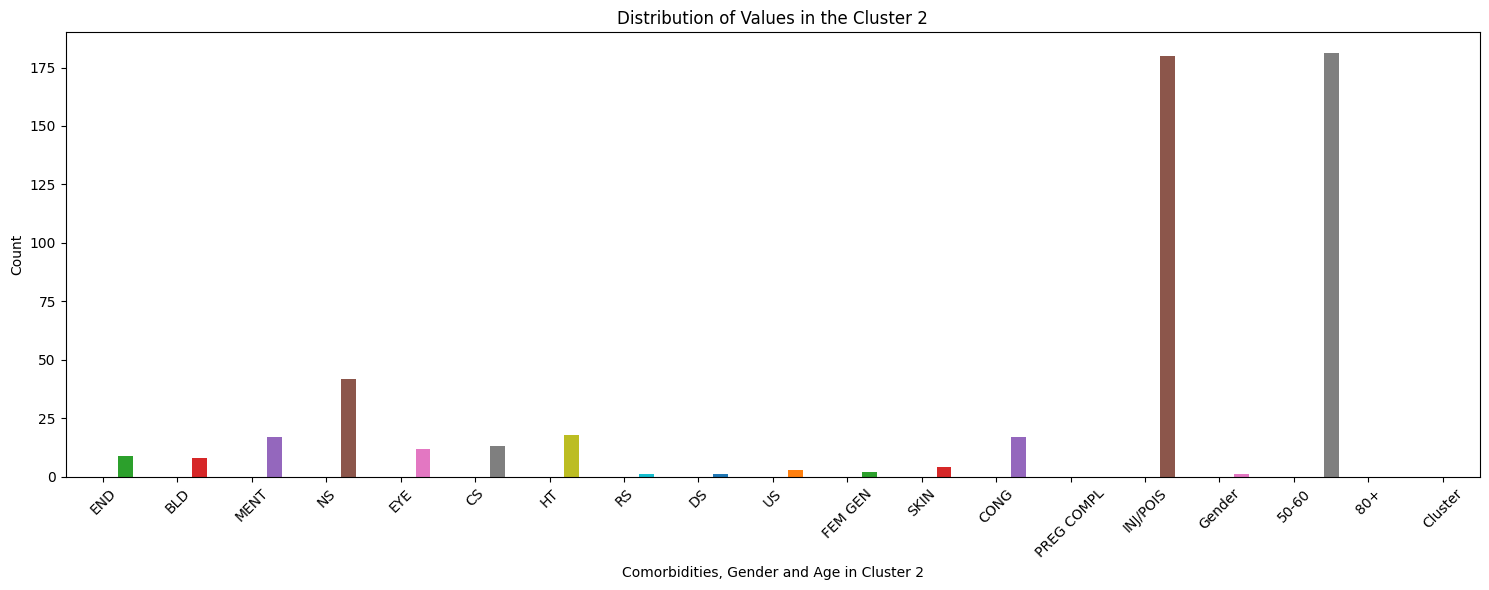

In [81]:
import matplotlib.pyplot as plt

# Distribution of cluster values in Cluster 2
plt.figure(figsize=(15, 6))

# Breite der Balken
bar_width = 0.2


# Iteriere über die Spalten und zeige die Verteilung der Werte an
for idx, column in enumerate(best_cluster_2_df.columns):
    # Ignoriere die Gender-Spalte, um 0-Werte anzuzeigen
    if column != 'Gender':
        values = best_cluster_2_df[column][best_cluster_2_df[column] != 0].value_counts()
        x_positions = idx + (bar_width * (values.index - len(best_cluster_2_df.columns) / 2))
        plt.bar(x_positions, values, width=bar_width, label=column)

plt.xlabel('Comorbidities, Gender and Age in Cluster 2')
plt.ylabel('Count')
plt.title('Distribution of Values in the Cluster 2')
plt.xticks(range(len(best_cluster_2_df.columns)), best_cluster_2_df.columns, rotation=45)

# Verschieben der Beschriftung unter den ersten Balken
ax = plt.gca()
#ax.xaxis.set_label_coords((len(best_cluster_0_df.columns) - 1) / 2, -0.15)

# Festlegen des Bereichs der X-Achse, ab dem die Beschriftung beginnt
ax.set_xlim(-0.5, len(best_cluster_2_df.columns) - 0.5)

plt.tight_layout()
plt.show()

In [82]:
# Spalten entfernen, die durchgängig Null sind bis auf bei dem Geschlecht
columns_to_remove = []
for column in best_cluster_3_df.columns:
    if column != "Gender" and (best_cluster_3_df[column] == 0).all():
        columns_to_remove.append(column)

# Entferne die ausgewählten Spalten aus dem DataFrame
best_cluster_3_df = best_cluster_3_df.drop(columns=columns_to_remove)


print(best_cluster_3_df)



     INF  NEO  END  NS  EYE  CS  HT  DS  US  SKIN  MUSC-SKEL  CONG  \
5      0    0    0   0    0   0   0   1   0     0          0     0   
13     0    0    0   0    0   0   0   0   0     0          0     0   
15     0    0    0   0    0   0   0   1   0     0          0     0   
16     0    0    0   0    0   0   1   0   0     0          0     0   
17     0    0    0   0    0   1   0   0   0     0          0     0   
..   ...  ...  ...  ..  ...  ..  ..  ..  ..   ...        ...   ...   
959    0    0    0   1    0   0   0   0   0     0          0     0   
966    0    0    0   0    0   1   0   0   0     0          0     0   
968    0    0    0   1    0   0   0   0   0     0          0     0   
970    0    0    0   0    0   1   0   0   0     0          0     0   
980    0    0    1   0    0   0   0   0   0     0          0     0   

     PREG COMPL  INJ/POIS Gender  0-20  20-30  40-50  80+  Cluster  
5             0         0      0     0      0      1    0        3  
13            0      

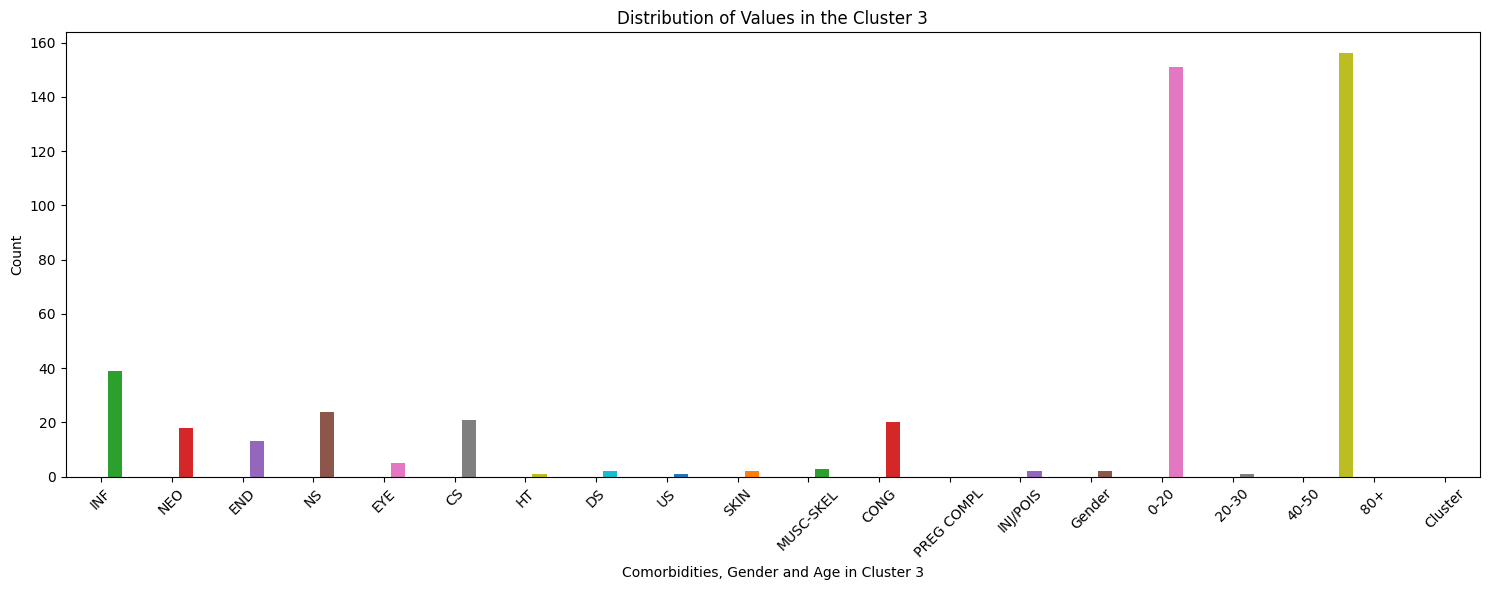

In [83]:
import matplotlib.pyplot as plt

# Distribution of cluster values in Cluster 3
plt.figure(figsize=(15, 6))

# Breite der Balken
bar_width = 0.2

# Iteriere über die Spalten und zeige die Verteilung der Werte an
for idx, column in enumerate(best_cluster_3_df.columns):
    # Ignoriere die Gender-Spalte, um 0-Werte anzuzeigen
    if column != 'Gender':
        values = best_cluster_3_df[column][best_cluster_3_df[column] != 0].value_counts()
        x_positions = idx + (bar_width * (values.index - len(best_cluster_3_df.columns) / 2))
        plt.bar(x_positions, values, width=bar_width, label=column)

plt.xlabel('Comorbidities, Gender and Age in Cluster 3')
plt.ylabel('Count')
plt.title('Distribution of Values in the Cluster 3')
plt.xticks(range(len(best_cluster_3_df.columns)), best_cluster_3_df.columns, rotation=45)
#plt.legend()
# Verschieben der Beschriftung unter den ersten Balken
ax = plt.gca()
#ax.xaxis.set_label_coords((len(best_cluster_0_df.columns) - 1) / 2, -0.15)

# Festlegen des Bereichs der X-Achse, ab dem die Beschriftung beginnt
ax.set_xlim(-0.5, len(best_cluster_3_df.columns) - 0.5)

plt.tight_layout()
plt.show()

     INF  NEO  THY  END  MET  BLD  MENT  NS  EYE  CS  ...  Gender  0-20  \
0      0    0    1    0    0    0     0   0    0   0  ...       1     0   
84     0    0    1    0    0    0     0   0    0   0  ...       1     0   
112    0    0    1    0    0    0     0   0    0   0  ...       0     0   
145    0    0    1    0    0    0     0   0    0   0  ...       1     0   
156    0    0    1    0    0    0     0   0    0   0  ...       0     0   
170    0    0    1    0    0    0     0   0    0   0  ...       0     0   
201    0    0    1    0    0    0     0   0    0   0  ...       0     0   
222    0    0    1    0    0    0     0   0    0   0  ...       1     0   
375    0    0    1    0    0    0     0   0    0   0  ...       1     0   
407    0    0    1    0    0    0     0   0    0   0  ...       1     0   
436    0    0    1    0    0    0     0   0    0   0  ...       0     0   
454    0    0    1    0    0    0     0   0    0   0  ...       1     0   
464    0    0    1    0  

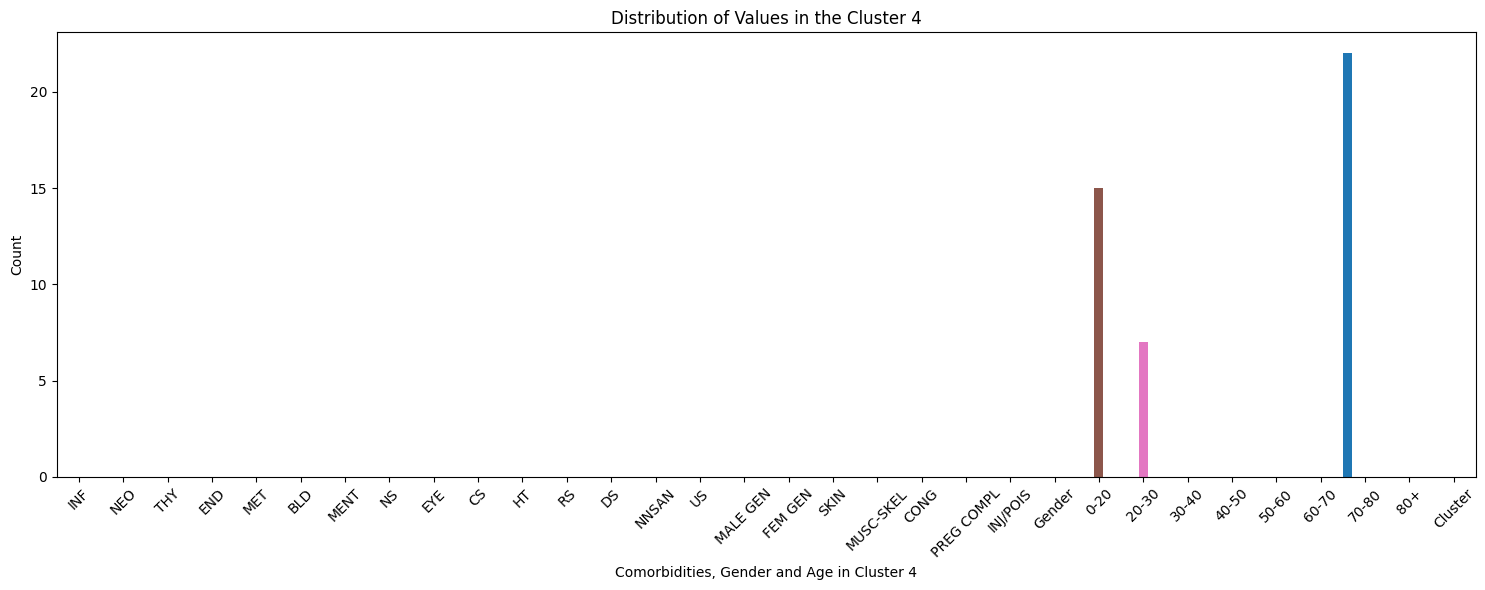

In [84]:
# Distribution of cluster values in Cluster 4

# Spalten entfernen, die durchgängig Null sind bis auf bei dem Geschlecht
columns_to_remove = []
for column in best_cluster_4_df.columns:
    if column != "Gender" and (best_cluster_4_df[column] == 0).all():
        columns_to_remove.append(column)

# Entferne die ausgewählten Spalten aus dem DataFrame
best_cluster_4_df = best_cluster_4_df.drop(columns=columns_to_remove)


print(best_cluster_4_df)

import matplotlib.pyplot as plt

# Erstelle eine leere Figur
plt.figure(figsize=(15, 6))

# Breite der Balken
bar_width = 0.2

# Iteriere über die Spalten und zeige die Verteilung der Werte an
for idx, column in enumerate(best_cluster_4_df.columns):
    # Ignoriere die Gender-Spalte, um 0-Werte anzuzeigen
    if column != 'Gender':
        values = best_cluster_4_df[column][best_cluster_4_df[column] != 0].value_counts()
        x_positions = idx + (bar_width * (values.index - len(best_cluster_4_df.columns) / 2))
        plt.bar(x_positions, values, width=bar_width, label=column)

plt.xlabel('Comorbidities, Gender and Age in Cluster 4')
plt.ylabel('Count')
plt.title('Distribution of Values in the Cluster 4')
plt.xticks(range(len(best_cluster_4_df.columns)), best_cluster_4_df.columns, rotation=45)
#plt.legend()
# Verschieben der Beschriftung unter den ersten Balken
ax = plt.gca()
#ax.xaxis.set_label_coords((len(best_cluster_0_df.columns) - 1) / 2, -0.15)

# Festlegen des Bereichs der X-Achse, ab dem die Beschriftung beginnt
ax.set_xlim(-0.5, len(best_cluster_4_df.columns) - 0.5)

plt.tight_layout()
plt.show()

     INF  NEO  THY  END  MET  BLD  MENT  NS  EYE  CS  ...  PREG COMPL  \
2      0    0    0    0    0    0     0   0    0   0  ...           1   
9      0    0    0    0    0    0     0   0    0   0  ...           0   
22     0    0    0    0    0    1     0   0    0   0  ...           0   
34     0    1    0    0    0    0     0   0    0   0  ...           0   
36     0    0    0    0    0    0     0   0    0   0  ...           0   
..   ...  ...  ...  ...  ...  ...   ...  ..  ...  ..  ...         ...   
976    0    0    0    0    0    0     0   0    0   0  ...           0   
986    0    0    0    0    0    0     0   0    0   0  ...           0   
989    1    0    0    0    0    0     0   0    0   0  ...           0   
991    0    0    0    0    0    1     0   0    0   0  ...           0   
992    0    0    0    0    0    0     0   0    0   1  ...           0   

     INJ/POIS  Gender  0-20  30-40  40-50  50-60  60-70  80+ Cluster  
2           0       1     0      0      0      0    

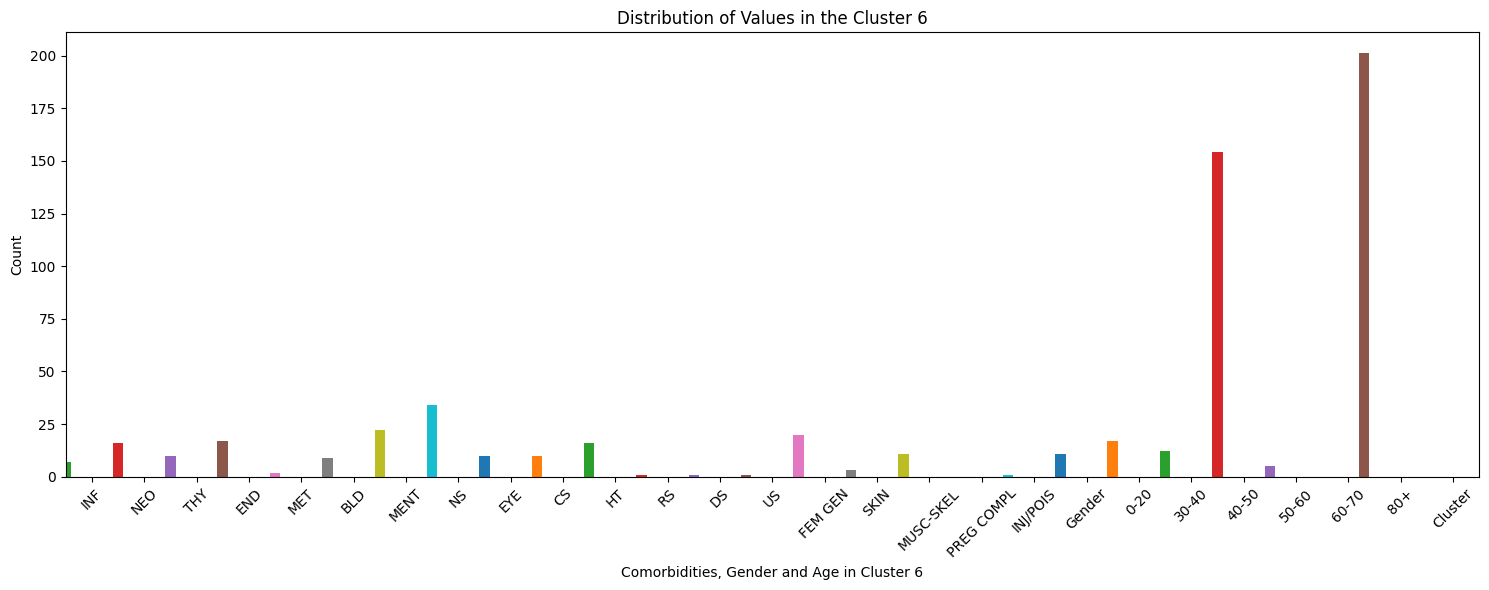

In [85]:
# Distribution of cluster values in Cluster 5
columns_to_remove = []
for column in best_cluster_5_df.columns:
    if column != "Gender" and (best_cluster_5_df[column] == 0).all():
        columns_to_remove.append(column)

# Entferne die ausgewählten Spalten aus dem DataFrame
best_cluster_5_df = best_cluster_5_df.drop(columns=columns_to_remove)


print(best_cluster_5_df)

import matplotlib.pyplot as plt

# Erstelle eine leere Figur
plt.figure(figsize=(15, 6))

# Breite der Balken
bar_width = 0.2

# Iteriere über die Spalten und zeige die Verteilung der Werte an
for idx, column in enumerate(best_cluster_5_df.columns):
    # Ignoriere die Gender-Spalte, um 0-Werte anzuzeigen
    if column != 'Gender':
        values = best_cluster_5_df[column][best_cluster_5_df[column] != 0].value_counts()
        x_positions = idx + (bar_width * (values.index - len(best_cluster_5_df.columns) / 2))
        plt.bar(x_positions, values, width=bar_width, label=column)

plt.xlabel('Comorbidities, Gender and Age in Cluster 5')
plt.ylabel('Count')
plt.title('Distribution of Values in the Cluster 5')
plt.xticks(range(len(best_cluster_5_df.columns)), best_cluster_5_df.columns, rotation=45)
#plt.legend()
# Verschieben der Beschriftung unter den ersten Balken
ax = plt.gca()
#ax.xaxis.set_label_coords((len(best_cluster_0_df.columns) - 1) / 2, -0.15)

# Festlegen des Bereichs der X-Achse, ab dem die Beschriftung beginnt
ax.set_xlim(-0.5, len(best_cluster_5_df.columns) - 0.5)

plt.tight_layout()
plt.show()

## MCA

https://umap-learn.readthedocs.io/en/latest/

In [177]:
# using MCA for dimension reduction
import prince 

data = X_shortened.copy()

mca = prince.MCA(n_components=2, random_state=42)
mca_result = mca.fit(data)
mca_result_1 = np.asarray(mca.fit_transform(data))

In [178]:
mca_result_1

array([[ 0.01640406,  0.22291841],
       [-0.20402934,  0.10747884],
       [-0.07415366,  0.02152377],
       ...,
       [ 0.04214236, -0.00579267],
       [-0.21003911,  0.07342633],
       [ 0.53407128,  0.19855483]])

In [179]:
mca_result = np.asarray(mca_result)
mca_result

array(MCA(random_state=42), dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


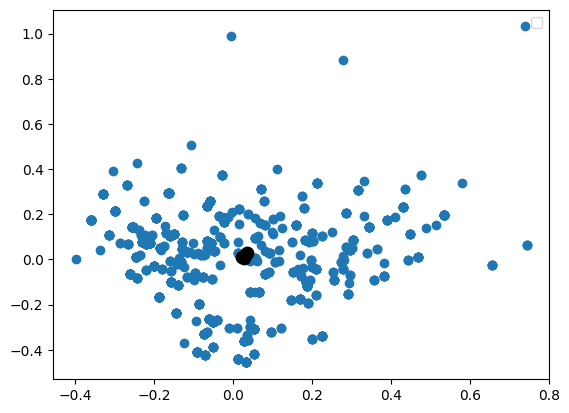

In [180]:
u_labels_3 = np.unique(label_3)
centroids_3 = kmeans_3.cluster_centers_

plt.scatter(mca_result_1[:,0] , mca_result_1[:,1])
plt.scatter(centroids_3[:,0] , centroids_3[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


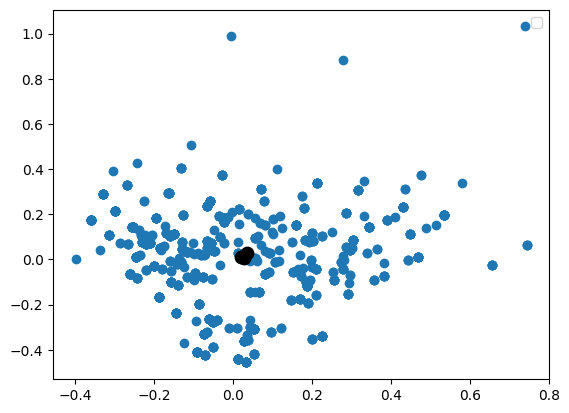

In [181]:
u_labels_4 = np.unique(label_4)
centroids_4 = kmeans_4.cluster_centers_

plt.scatter(mca_result_1[:,0] , mca_result_1[:,1])
plt.scatter(centroids_4[:,0] , centroids_4[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


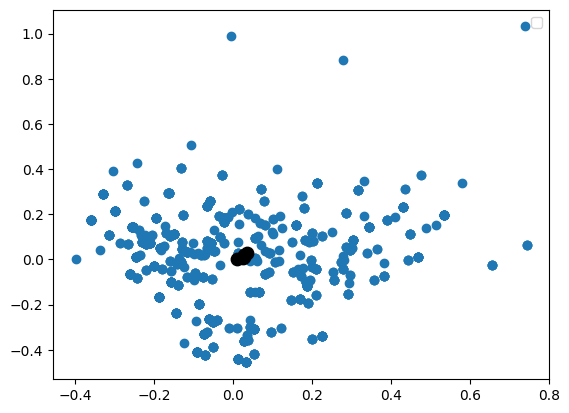

In [182]:
u_labels_5 = np.unique(label_5)
centroids_5 = kmeans_5.cluster_centers_

plt.scatter(mca_result_1[:,0] , mca_result_1[:,1])
plt.scatter(centroids_5[:,0] , centroids_5[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


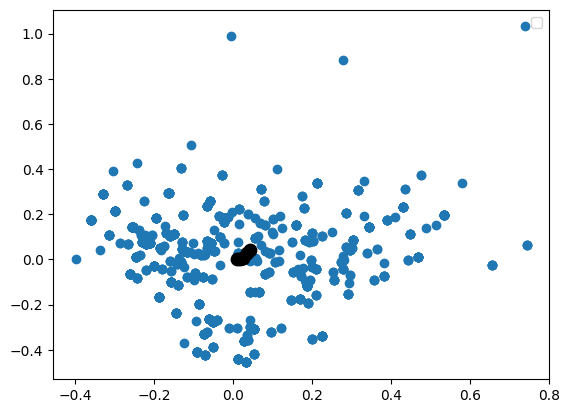

In [183]:
u_labels_6 = np.unique(label_6)
centroids_6 = kmeans_6.cluster_centers_

plt.scatter(mca_result_1[:,0] , mca_result_1[:,1])
plt.scatter(centroids_6[:,0] , centroids_6[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


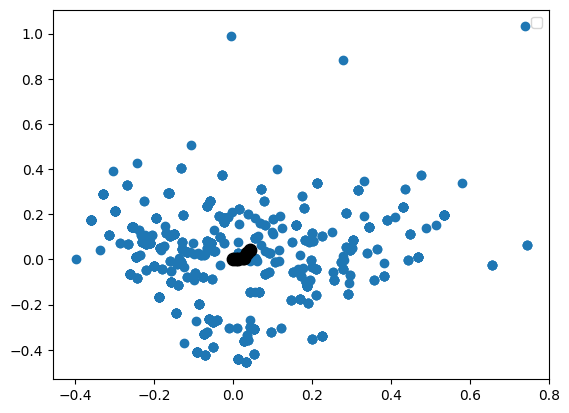

In [184]:
u_labels_7 = np.unique(label_7)
centroids_7 = kmeans_7.cluster_centers_

plt.scatter(mca_result_1[:,0] , mca_result_1[:,1])
plt.scatter(centroids_7[:,0] , centroids_7[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


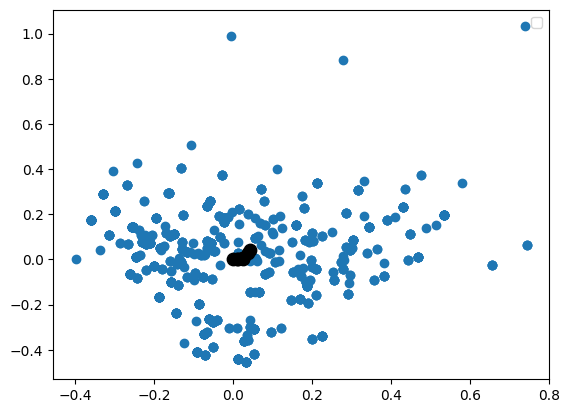

In [185]:
u_labels_8 = np.unique(label_8)
centroids_8 = kmeans_8.cluster_centers_

plt.scatter(mca_result_1[:,0] , mca_result_1[:,1])
plt.scatter(centroids_8[:,0] , centroids_8[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [19]:
import prince
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import altair as alt

data = X

mca = prince.MCA(n_components=2, random_state=42)
mca_result = mca.fit(data)
mca_result_1 = mca_result.transform(data)
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=100, random_state=42)
label = kmeans.fit_predict(mca_result_1)

# Erstellen eines DataFrames mit MCA-Ergebnissen und Cluster-Labels
result_df = pd.DataFrame(mca_result_1, columns=['MCA Component 1', 'MCA Component 2'])
result_df['Cluster_Label'] = label

# Erstellen des Altair-Plots
scatter_plot = alt.Chart(result_df).mark_circle().encode(
    x='MCA Component 1',
    y='MCA Component 2',
    color='Cluster_Label:N',
    tooltip=['MCA Component 1', 'MCA Component 2', 'Cluster_Label']
)

# Anzeigen des Altair-Plots
scatter_plot.show()


RuntimeError: Internal: _stream is not defined.